In [11]:
import numpy as np
%run FrozenLake.ipynb
env = FrozenLakeEnv()
def sarsa(lambdaa):
    
    env.reset()
    alpha = 0.1
    gamma = 1.0
    epsilon = 1.0
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    returns = []

    #soft policy based Q
    def egreedy(state,epsilon):
        if np.random.random() < epsilon:
            return np.random.choice([a for a in range(env.action_space.n)])
        else:
            maxQ = max(Q[state,:])
            for a in range(env.action_space.n):
                if Q[state,a] == maxQ:
                    action = a 
            return action



    for episode in range(10000):
        epsilon = 0.99 * epsilon
        state = env.reset()
        action = egreedy(state,epsilon)

        R = []
        e = np.zeros((env.observation_space.n, env.action_space.n))

        episodeStates = []
        episodeActions = []
        episodeStates.append(state)
        episodeActions.append(action)
        done = False 
        #until terminal state
        while (not done):


            nextState, reward, done, info = env.step(action)
            nextAction = egreedy(nextState,epsilon)

            delta = reward + gamma * Q[nextState, nextAction] - Q[state, action]


            R.append(reward)
            e[state, action] = 1

            episodeStates.append(nextState)
            episodeActions.append(nextAction)

            for i in range(len(episodeStates)):
                Q[episodeStates[i],episodeActions[i]] = Q[episodeStates[i],episodeActions[i]] + alpha * delta * e[episodeStates[i],episodeActions[i]]
                e[episodeStates[i],episodeActions[i]] = lambdaa * gamma * e[episodeStates[i],episodeActions[i]]

            state = nextState
            action =  nextAction

        T = len(R)
        AVret = 0
        t = T - 2
        while t >= 0:
            AVret = R[t+1] + gamma * AVret
            t = t - 1

        returns.append(AVret)


    window = 100
    averagedReturns = np.zeros(len(returns)-window+1)

    for i in range(len(averagedReturns)):
        averagedReturns[i] = np.mean(returns[i:i+window])
    import matplotlib.pyplot as plt
    plt.plot(averagedReturns, linewidth=2)
    plt.xlabel("Episode")
    plt.ylabel("average return")
    plt.show()
    return Q

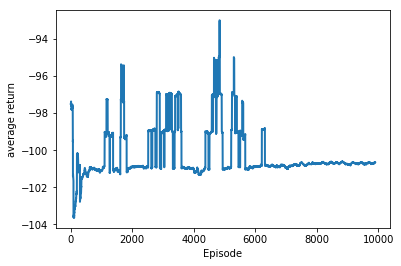

array([[-135.82303268, -100.74409104, -119.54615154, -114.88889752],
       [-121.58236909, -100.57462198, -115.75810016, -118.65368511],
       [-113.19727106, -100.47773838, -110.57860291, -117.82130892],
       [-111.60502779, -119.77467889, -100.38488531, -174.14886429],
       [-106.72467566, -106.73867563,  -91.29105665, -137.55809255],
       [-108.31564603,  -87.51873076, -142.31624336, -119.3673781 ],
       [-130.04007641, -100.92602368, -826.48065174,  -87.28525606],
       [ -30.24966237,  -87.3313518 , -107.33500255,  -85.69491089],
       [-114.31660369, -133.26417581, -100.56199771, -123.24722564],
       [-119.83743931, -115.0152683 , -100.48374022, -115.0474435 ],
       [-107.34046059, -100.32610583, -107.41692254, -113.91891631],
       [-104.90277369, -100.28544987, -103.72433279, -104.51136468],
       [-112.07932422,  -98.72016549, -114.96498704, -112.76758173],
       [-107.34770721, -111.81177168, -130.38120169, -135.4909512 ],
       [ -98.06252088,  -83.726477

In [43]:
sarsa(1)

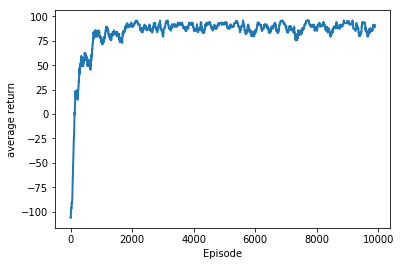

In [6]:
sarsa(0)

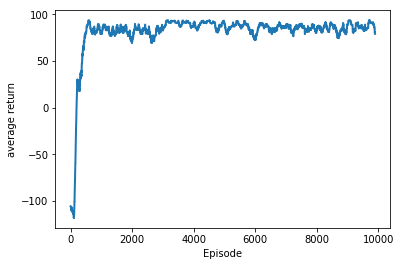

In [7]:
sarsa(0.3)

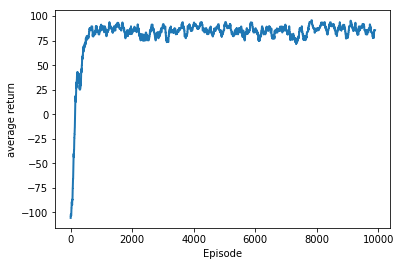

array([[-15.08666516, -13.91773723,  87.39309522, -13.89122418],
       [ -5.61356848, -13.47109208,  87.91556086, -15.0774913 ],
       [-14.81769901, -13.39978276,  88.69139503, -14.35081664],
       [-15.47200507, -11.63899401,  89.24151779,  -9.08201605],
       [  2.65183312, -18.7774297 ,  89.17682262,  -8.36310978],
       [  1.52045575,  -1.89321703,  89.44757496,  12.85238827],
       [  0.09907664,   9.21969213,  89.31852861,  13.84848028],
       [ -5.47218425,  89.17283605,  -5.55235607,  -4.55360524],
       [-21.42483162, -17.45225114, -21.6371962 ,  82.88888696],
       [-24.58605581, -22.44386689,  80.09478526, -18.67717887],
       [-22.0825182 , -25.65325705,  86.84591955, -24.62731817],
       [-23.4242937 , -63.20663331, -24.0741502 ,  88.43349772],
       [-16.15366879, -23.04790177,  86.46612592, -23.12862316],
       [-16.59392677, -18.96034126, -14.53238065,  88.91184982],
       [ -9.19779898, -15.16566772,  -9.69778745,  89.90664553],
       [  6.01438984,  88

In [38]:
sarsa(0.7)

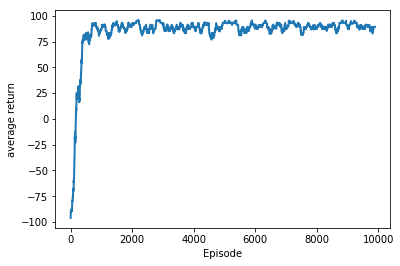

array([[  8.8451969 ,  -7.87005426,  -7.0295384 ,  91.88435579],
       [-27.26878677, -16.08405466,  92.65459188,  -0.33286557],
       [ -1.85385148,  -6.13157225,  93.14033319,  -7.6167108 ],
       [ -7.36566516, -19.73673862,  93.41545701, -12.89458262],
       [-14.38221139, -13.80965349,  93.38067611,  -7.74533035],
       [-18.83165087, -17.88151999,  94.56201099,  -1.57801249],
       [ -9.89072461,  17.38330356,  95.12499459,   6.12067352],
       [ -8.25603823,  95.5624753 ,   3.17098256,  -6.11263952],
       [-31.08154039, -28.07868736,  90.45207849, -30.03122299],
       [-29.80836176, -30.24637668, -22.50815776,  90.7514604 ],
       [-24.04966183, -26.46587822, -13.84129121,  90.87264258],
       [-36.82687207, -50.69836705, -22.9802288 ,  89.48739027],
       [-32.49052307, -33.39721094,  90.7620808 , -23.76028181],
       [-28.68442604, -31.32365794, -11.89934057,  92.40479358],
       [-13.98416439, -21.02489829,  94.12895436,  -6.95791345],
       [  7.8276842 ,  96

In [41]:
sarsa(0.8)

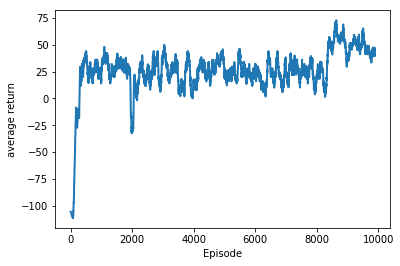

array([[-53.41794358,  43.3433809 , -48.1082748 , -53.44275   ],
       [-48.09141287, -48.09792931,  44.54147646, -51.44207618],
       [-47.67683565, -53.24077681, -48.48704638,  46.55753451],
       [-47.70360705, -47.97841787,  49.12654185, -47.92413458],
       [-47.82224159,  50.69984915, -47.94422695, -47.90769348],
       [-49.36115438, -48.70694269,  49.20631846, -48.48639004],
       [-48.58170514,  49.628482  , -48.57021866, -48.00369788],
       [ 51.37013469, -49.77608988, -50.00086056, -52.42230709],
       [-48.27601894, -63.28176562,  43.33988175, -59.11504112],
       [-52.71610967, -48.22144574, -54.02185731,  43.75785017],
       [-52.39082209, -61.85222722, -52.84228877,  41.24873635],
       [-66.1417997 , -80.06051617, -53.12701717,  45.1739786 ],
       [-47.80576892, -47.71257969,  49.94599467, -47.62259617],
       [-56.11353031,  50.52912778, -50.09724833, -57.83748232],
       [-48.28612382,  52.50912976, -48.26312596, -45.88389201],
       [-47.79583375, -50

In [56]:
sarsa(0.9)

In [52]:
def sarsaRegret(lambdaa,OpQ):
    env = FrozenLakeEnv()
    env.reset()
    alpha = 0.1
    gamma = 1.0
    epsilon = 1.0
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    returns = []
    regret = []
    #soft policy based Q
    def egreedy(state,epsilon):
        if np.random.random() < epsilon:
            return np.random.choice([a for a in range(env.action_space.n)])
        else:
            maxQ = max(Q[state,:])
            for a in range(env.action_space.n):
                if Q[state,a] == maxQ:
                    action = a 
            return action



    for episode in range(200):
        epsilon = 0.99 * epsilon
        state = env.reset()
        action = egreedy(state,epsilon)

        R = []
        e = np.zeros((env.observation_space.n, env.action_space.n))

        episodeStates = []
        episodeActions = []
        episodeStates.append(state)
        episodeActions.append(action)
        done = False 
        epRegret = 0
        #until terminal state
        while (not done):


            nextState, reward, done, info = env.step(action)
            nextAction = egreedy(nextState,epsilon)
           
            delta = reward + gamma * Q[nextState, nextAction] - Q[state, action]
            
            #optimal action
            opAction = OpQ[state]
            opnextState, opreward, opdone, opinfo = env.step(action)
            epRegret = epRegret + (opreward - reward)
            R.append(reward)
            e[state, action] = 1

            episodeStates.append(nextState)
            episodeActions.append(nextAction)

            for i in range(len(episodeStates)):
                Q[episodeStates[i],episodeActions[i]] = Q[episodeStates[i],episodeActions[i]] + alpha * delta * e[episodeStates[i],episodeActions[i]]
                e[episodeStates[i],episodeActions[i]] = lambdaa * gamma * e[episodeStates[i],episodeActions[i]]

            state = nextState
            action =  nextAction
        regret.append(epRegret)
    
    return regret

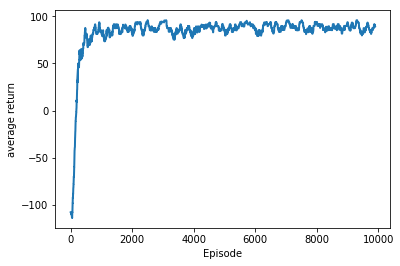

In [46]:
opQ = sarsa(0.3)


In [53]:
opAction = []
for i in range(env.observation_space.n):
    x = np.where(opQ[i]==np.max(opQ[i]))
    opAction.append(x[0][0])
    
regret = sarsaRegret(0.3,opAction)

Text(0, 0.5, 'regret')

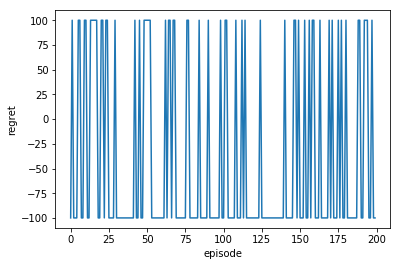

In [55]:
import matplotlib.pyplot as plt
plt.plot(regret)
plt.xlabel("episode")
plt.ylabel("regret")